# Prim and dimensional stacking

In [1]:
import pandas as pd
from ema_workbench.analysis import prim
import matplotlib.pyplot as plt
from ema_workbench.analysis import dimensional_stacking

In [2]:
experiments = pd.read_csv('Outcomes/Experiments_from_Exploration_10000scenarios_pf5.csv')
outcomes_total_dikerings_load_DF = pd.read_csv('Outcomes/Proccesed_basecase_fully_aggregated_10000scenarios_pf5.csv')

## Deaths

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total deaths in dikering 5

In [3]:
data = outcomes_total_dikerings_load_DF['A.5_Total Expected Number of Deaths']

#desirable risk by Dutch government (1/100000) times citizens of Deventer (+/- 100000 in jan 2019)
y = data < 1
#risk five times smaller than desirable risk by Dutch government (1/100000) times citizens of Deventer (+/- 100000 in jan 2019)
y5 = data < (y/5)

prim_alg = prim.Prim(experiments,y, threshold=0.8)
prim_alg5 = prim.Prim(experiments,y5, threshold=0.8)

box1 = prim_alg.find_box()
box1_5 = prim_alg5.find_box()

#### Treshold of Dutch government

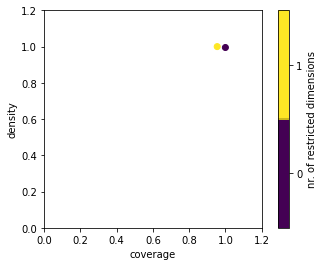

In [4]:
box1.show_tradeoff()
plt.show()

In [5]:
box1.inspect(0)

coverage        1
density     0.995
id              0
mass            1
mean        0.995
res_dim         0
Name: 0, dtype: object

Empty DataFrame
Columns: [(box 0, min), (box 0, max), (box 0, qp values)]
Index: []



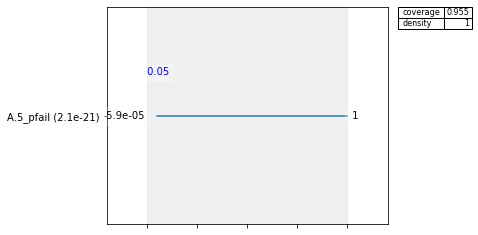

In [6]:
box1.inspect(1,style='graph')
plt.show()

In [7]:
box1.select(1)

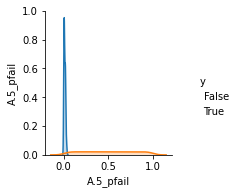

In [8]:
fig = box1.show_pairs_scatter()

Analysis: the outcomes of the model suggest that in dikering 5 causialties will remain under the trshold of the  Dutch goverment in the observed scenarios when the pfail fo the dike is 0.05 or higher.

#### Risk five times smaller than treshold of Dutch government

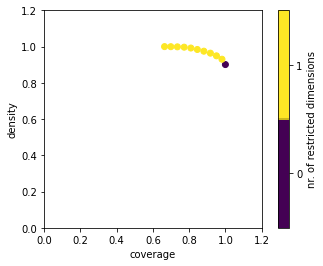

In [9]:
box1_5.show_tradeoff()
plt.show()

In [10]:
box1.inspect(1)

coverage    0.954774
density            1
id                 1
mass            0.95
mean               1
res_dim            1
Name: 1, dtype: object

              box 1                                         
                min       max                      qp values
A.5_pfail  0.050044  0.999928  [2.085773207078957e-21, -1.0]



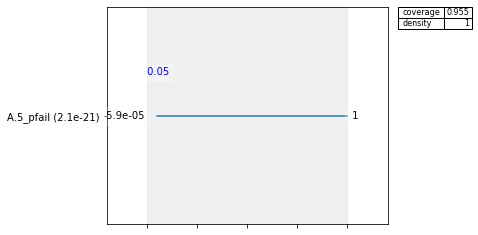

In [11]:
box1.inspect(1,style='graph')
plt.show()

Analysis: even when the treshold of number of deaths per year is made five times smaller the treshold of the Dutch government the model still suggest that with a pfail of 0.05 or higher this new treshold is met as well

#### Dimensinal stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


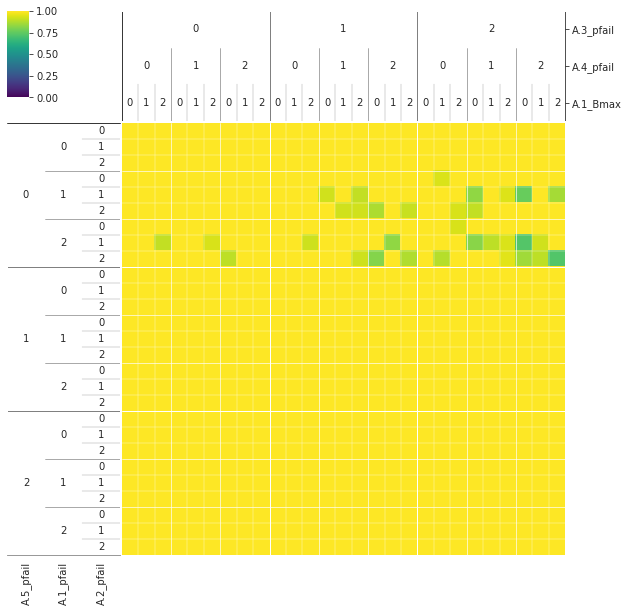

In [12]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

### Total deaths in all the dikerings

In [13]:
outcomes_total_dikerings_load_DF.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,A.1_Expected Annual Damage 0,A.1_Dike Investment Costs 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Dike Investment Costs 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,...,A.5_Total Dike Investment Costs,A.5_Total Expected Number of Deaths,RfR Total Costs,Total Expected Evacuation Costs,Other Areas Total Number of Deaths,Other Areas Total Dike Investment Costs,Other Areas Total Damage,Total Deaths,Expected Total Damage,Total Investment Costs
0,0,0,0,3.291000e+07,0,0.034575,2.121065e+07,0,0.029376,1.996856e+06,...,0,0.000000,0.0,0.0,0.253596,0,2.797798e+08,0.253596,2.797798e+08,0
1,1,1,1,2.021877e+08,0,0.168648,0.000000e+00,0,0.000000,1.020952e+07,...,0,0.230592,0.0,0.0,0.571481,0,7.456149e+08,0.802073,9.968985e+08,0
2,2,2,2,6.829399e+08,0,0.663932,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.015403,0.0,0.0,1.991796,0,2.198876e+09,2.007198,2.211469e+09,0
3,3,3,3,6.296338e+07,0,0.033067,2.755807e+07,0,0.019180,4.177865e+08,...,0,0.000000,0.0,0.0,1.767153,0,1.272594e+09,1.767153,1.272594e+09,0
4,4,4,4,4.438671e+08,0,0.225191,0.000000e+00,0,0.000000,0.000000e+00,...,0,0.000000,0.0,0.0,0.684371,0,1.254702e+09,0.684371,1.254702e+09,0


#### Treshold of Dutch government

In [14]:
data = outcomes_total_dikerings_load_DF['Total Deaths']

# (1/100000) * 163025: treshold of dutch government times citizens of the 5 towns/cities -> 1.6
y = data < 1.6
y1 = data < (y/5)


prim_alg_2 = prim.Prim(experiments,y, threshold=0.8)
prim_alg_2_1 = prim.Prim(experiments,y1, threshold=0.8)
box2 = prim_alg_2.find_box()
box2_5 = prim_alg_2_1.find_box()

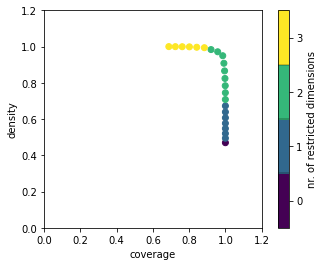

In [15]:
box2.show_tradeoff()
plt.show()

In [16]:
box2.inspect(12)

coverage    0.995528
density     0.865901
id                12
mass          0.5399
mean        0.865901
res_dim            2
Name: 12, dtype: object

             box 12                                          
                min       max                       qp values
A.1_pfail  0.337300  0.999930                     [0.0, -1.0]
A.3_pfail  0.186664  0.999985  [5.321350327578519e-168, -1.0]



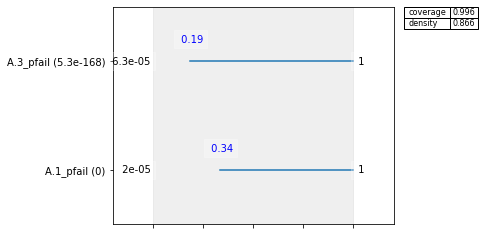

In [17]:
box2.inspect(12,style='graph')
plt.show()

In [18]:
box2.select(12)

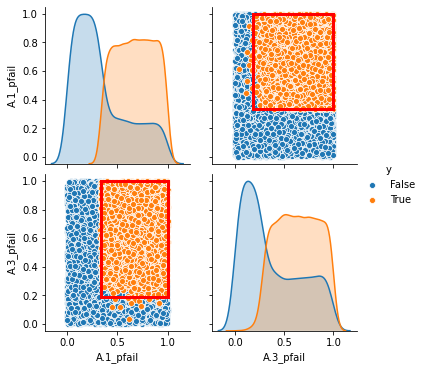

In [19]:
fig = box2.show_pairs_scatter()

Analysis: the results of the prim analysis suggest that the treshold of the Dutch government is met when the pfail of the dikes in dikering 1 and 3 are higher than 0.19 and 0.34 respectively.

#### Risk five times smaller than treshold of Dutch government

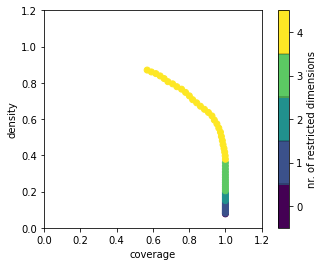

In [20]:
box2_5.show_tradeoff()
plt.show()

In [21]:
box2_5.inspect(35)

coverage    0.986996
density     0.458888
id                35
mass          0.1654
mean        0.458888
res_dim            4
Name: 35, dtype: object

             box 35                                          
                min       max                       qp values
A.3_pfail  0.519334  0.999985   [3.852518922607367e-96, -1.0]
A.1_pfail  0.488676  0.999930  [2.0498772836922917e-85, -1.0]
A.2_pfail  0.264530  0.999941   [9.096082061746195e-25, -1.0]
A.5_pfail  0.098222  0.999928  [0.00016179228371126033, -1.0]



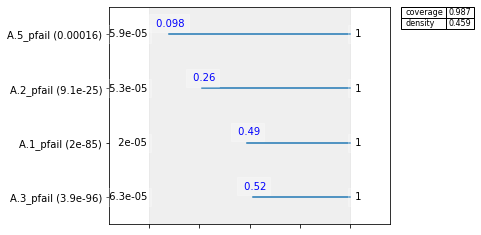

In [22]:
box2_5.inspect(35,style='graph')
plt.show()

In [23]:
box2_5.select(35)

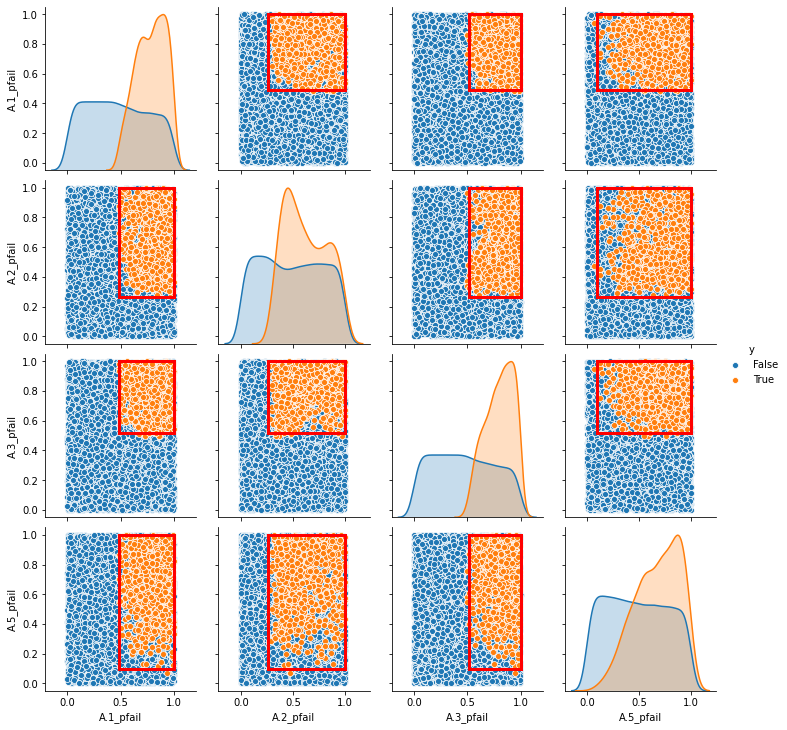

In [24]:
fig = box2_5.show_pairs_scatter()

Analysis: when the treshold is made five times smaller than used by the Dutch government, it is found that the pfail of dikerings 1,2,3&5 have to meet certain standards. Still dikerings 1 and 3 have to be guarenteed for the most with pfail minimums of 0.46 and 0.51. However, also dikreings 2 and 5 have restrains. This holds with a density of 0.827 and a coverage of 0.923.

#### Dimensional stacking

c:\program files (x86)\python37-32\lib\site-packages\ema_workbench\analysis\dimensional_stacking.py:404: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ooi = pd.DataFrame(y[:, np.newaxis], columns=[ooi_label])


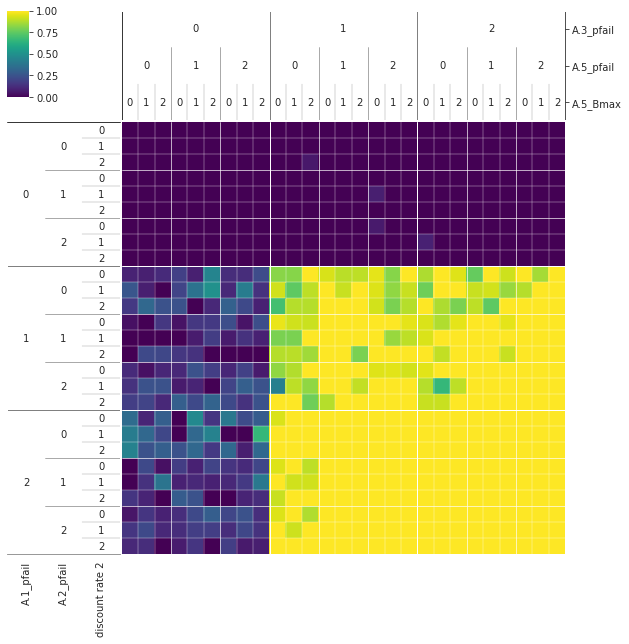

In [25]:
dimensional_stacking.create_pivot_plot(experiments, y)
plt.show()

## Damage

In this section analysis are performed on the simulated number of deaths by the dike_function.py model

### Total damage for all dikerings

In [26]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']

<AxesSubplot:ylabel='Density'>

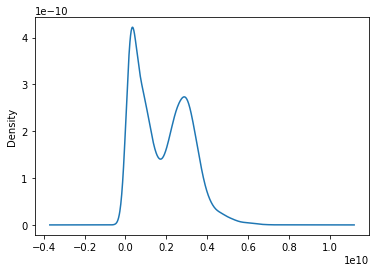

In [27]:
data.plot.kde()

In [42]:
data = outcomes_total_dikerings_load_DF['Expected Total Damage']
print(data.max())
print(data.min())
print(data.quantile(.2))

7476664912.093519
22991673.54156649
242382297.91068038


As treshold we take 441575627.8723845 since this is the lowest 20% of the damage cases

In [48]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

y = data < 441575627.8723845
#y = data > 242382297.91068038
prim_alg_damage = prim.Prim(experiments,y, threshold=0.8)

box_damage = prim_alg_damage.find_box()

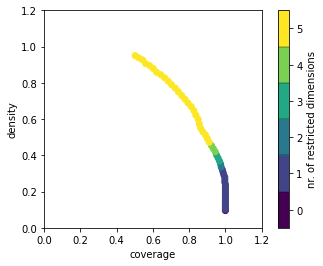

In [49]:
box_damage.show_tradeoff()
plt.show()

In [53]:
box_damage.inspect(2)

coverage    0.664211
density     0.828084
id                50
mass          0.0762
mean        0.828084
res_dim            5
Name: 50, dtype: object

             box 50                                           
                min       max                        qp values
A.5_pfail  0.000059  0.261332  [-1.0, 1.2065450596212018e-261]
A.1_pfail  0.404237  0.999930    [6.503901077460246e-54, -1.0]
A.3_pfail  0.294223  0.999985     [4.38956696409064e-35, -1.0]
A.4_pfail  0.185172  0.999912    [4.102603912859886e-12, -1.0]
A.2_pfail  0.146286  0.999941    [1.823272418127287e-10, -1.0]



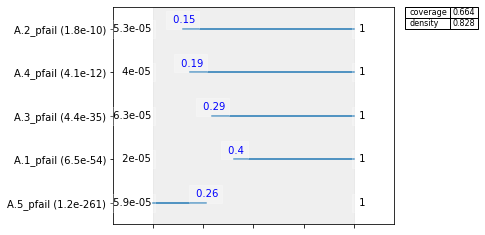

In [54]:
box_damage.inspect(2,style='graph')
plt.show()

Analysis: the total damage is reduced to the lowest 20% of the outcomes when the pfail of dikering 5 is above 0.098. This is with a coverage of 0.943 and a density of 0.988. 

### Total damage dikering 5

In [55]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

<AxesSubplot:ylabel='Density'>

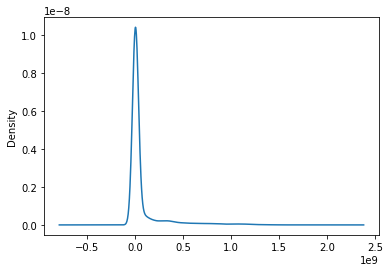

In [56]:
data.plot.kde()

In [57]:
print(data.max())
print(data.min())
print(data.quantile(.2))

1587309486.2147589
0.0
0.0


In [58]:
data = outcomes_total_dikerings_load_DF['A.5_Expected Total Damage']

y = data > 0

prim_alg_damage5 = prim.Prim(experiments,y, threshold=0.8)

box_damage5 = prim_alg_damage5.find_box()

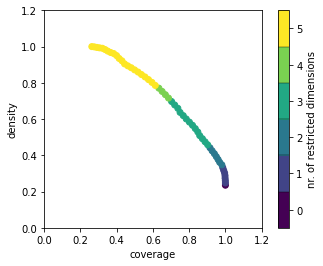

In [59]:
box_damage5.show_tradeoff()
plt.show()

In [60]:
box_damage5.inspect(35)

coverage      0.5755
density     0.818017
id                35
mass          0.1654
mean        0.818017
res_dim            5
Name: 35, dtype: object

             box 35                                          
                min       max                       qp values
A.5_pfail  0.000059  0.304078                     [-1.0, 0.0]
A.3_pfail  0.221499  0.999985  [3.9220809708264487e-32, -1.0]
A.2_pfail  0.141180  0.999941   [5.171235069324331e-13, -1.0]
A.1_pfail  0.140052  0.999930   [1.466735475766755e-06, -1.0]
A.4_pfail  0.050909  0.999912   [0.0051218695198046865, -1.0]



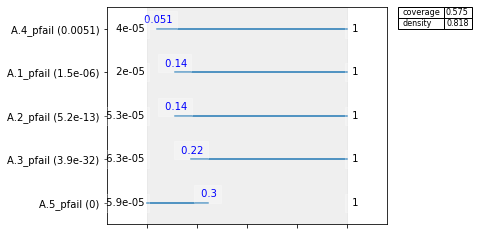

In [61]:
box_damage5.inspect(35,style='graph')
plt.show()

Analysis: it is seen that pfail higher than 0.3 at dikering 5 will reduce the damage to zero in dikering 5 when the pfail ratio of the other dikerings fall in the interfall. This is with a coverage of 0.575 and a density of 0.818

## Conclusion

Deventer has compared to the other dikerings in the IJssel area a low expected number of deaths each year. Only when the pfail of the dikering in the Deventer area is really low(<0.05) Deventer will likely not meet the treshold by the Dutch government. In the total area the pfail of dikerings 1 and 3 are more imporatant to the number of deaths.

However, in terms of damage the pfail of Deventer's dikering is the most significant. Looking at the 20% lowest damage costs it is observed that these outcomes are most likely to happen when the pfail of Deventer is above 0.26